#İVAA 2023 Data Translator Project

---





---

##REPORT: TIME SERIES ANALYSIS & PREDICTIVE MODELLING OF TCMB TOURISM DATASET



*   **Introduction**

The Central Bank of the Republic of Turkey (TCMB) provided the data used in this report's analysis of Turkey's tourism revenue. Understanding the connections between tourism income and numerous variables—such as USD/TL exchange rates, high-income nations, seasonal patterns, and the COVID-19 effect on tourism—was the aim of the study. The research's conclusions are intended to help stakeholders in the tourist sector make decisions by offering insightful information.

*   **Data Preprocessing**

The dataset was loaded into a Pandas DataFrame, and necessary data preprocessing steps were executed. This included handling missing values, converting date columns to the datetime format, and ensuring data consistency.

*   **Exploratory Data Analysis (EDA)**

The dataset was analyzed to gain insights into Turkey's tourism incomes over time. Trends, seasonality, and significant patterns were visualized. The analysis formed the foundation for subsequent modeling.

Furthermore, to analyze the impact of Covid19 on the Turkey's tourism, an external data source named as "Impact of Covid-19 Pandemic on the Global Economy" is also benefited.  

*   **Predictions for 2024**

A Polynomial Regression model was utilized for time series forecasting. The model incorporates historical monthly data. The total income is highly expected to be higher than the year 2023. The tourism companies should be focusing on Russia, due to the increasing potential for higher income from Russia.


*   **Results & Conclusion**

The investigation of Turkey's tourism revenue showed a significant correlation between revenue and the USD/TL exchange rate. The positive association suggests that more tourism receipts may result from a more favorable exchange rate (Part 2b). Furthermore, knowing which nations generate the most cash enables focused marketing campaigns to draw more tourists to these areas.

The concentration of income in the summertime points to the necessity for policies to promote year-round tourism through diversification (Part 1b).

The importance of controlling the pandemic's effects on the tourism sector is shown by the negative correlation between COVID-19 infections and tourism revenue (Part 2a). Restoring visitor confidence and implementing suitable safety and health regulations can help lessen the effects of COVID-19 on Turkey's tourism industry.

Russia, Germany, and England were found to be the top three nations considerably boosting Turkey's tourism revenue (Part 1f). Customized marketing strategies can result from an understanding of the tastes and habits of visitors from these nations.

Overall, this analysis offers insightful information that players in the tourism sector may use to make wise choices and create powerful plans to increase tourist revenue in Turkey.




---





---


##Nationality Mix of Visitors (2012 - 2022):


*   Time  Series  Visualization  of  Column's
*   Dividing  Months  into  Blue/Red  groups  &  Displaying  Summed  Time Series Data and Major Shift Dates
*   Finding Major Shift Dates based on the Blue/Red Groups
*   Ranking & Displaying Major Shifts Chart
*   Finding the top 5 countries for Turkey's tourism each year
*   Visualizing the Top 5 Countries for tourism in Turkey (2008-2023)




In [ ]:
#@title
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Path to the Excel file on Google Drive
file_path = '/content/drive/MyDrive/MerkezBankasıMilliyetlereGöreZiyaretci.xlsx'

# Read the Excel file and Sheet1 sheet
df = pd.read_excel(file_path, sheet_name='Sayfa1')
df_almanya = df
df_copy = df

# Create a list of column names excluding columns containing 'TOP'
df_columns = [col for col in df.columns if 'TOP' not in col]

# Create a new DataFrame containing only the selected columns
df = df[df_columns]

# Display the content of the DataFrame
print(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
       Tarih  TP ODEMGZS ALMANYA  TP ODEMGZS ARNAVUTLUK  TP ODEMGZS AVUSTURYA  \
0 2008-01-01              177233                   2811                 20207   
1 2008-02-01              143666                   2604                 16295   
2 2008-03-01              249797                   3626                 23558   
3 2008-04-01              242531                   3219                 22668   
4 2008-05-01              399724                   4156                 32265   

   TP ODEMGZS BELCIKA  TP ODEMGZS BOSNAHERSEK  TP ODEMGZS BULGARISTAN  \
0               12389                    2546                   99048   
1               11309                    2342                   82707   
2               21097                    2952                  102877   
3               30772                    3539                  110627   
4               504

In [ ]:
#@title
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
Tarih                      0
TP ODEMGZS ALMANYA         0
TP ODEMGZS ARNAVUTLUK      0
TP ODEMGZS AVUSTURYA       0
TP ODEMGZS BELCIKA         0
                          ..
TP ODEMGZS DASYA           0
TP ODEMGZS AVUSTRALYA      0
TP ODEMGZS YENIZELLANDA    0
TP ODEMGZS OKYANUSYA       0
TP ODEMGZS MILLIYESIZ      0
Length: 97, dtype: int64


**1a) Dataframe's Column's Time Series Visualization**

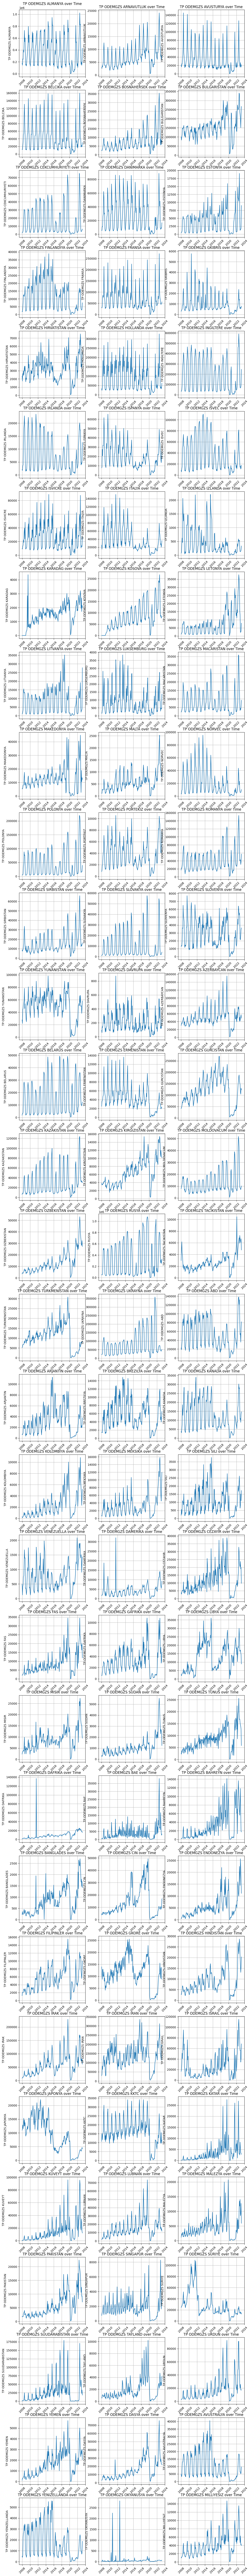

In [ ]:
#@title
import matplotlib.pyplot as plt

df_copy['Date'] = pd.to_datetime(df.iloc[:, 0], format='%m-%Y')
df_semi_annual = df

# Next, we will filter out the columns that contain 'TOP' in their names
non_top_columns = [col for col in df.columns if 'TOP' not in col]
non_top_columns = non_top_columns[1:]

# Calculate the number of rows and columns for the grid layout
num_rows = (len(non_top_columns) + 2) // 3  # 3 columns per row
num_cols = min(len(non_top_columns), 3)

# Create a grid layout for the plots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(14, num_rows*5))

# Flatten the axes array to iterate through all subplots
axes = axes.flatten()

# Create line charts for each column based on year-based periods
for i, column in enumerate(non_top_columns):
    ax = axes[i]
    ax.plot(df['Tarih'], df[column])

    ax.set_ylabel(column)
    ax.set_title(f'{column} over Time')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True)

# Hide any remaining empty subplots
for i in range(len(non_top_columns), num_rows*num_cols):
    axes[i].axis('off')

plt.show()




---


**1b) Dividing Months into Blue/Red groups and Displaying Summed Time Series Data and Major Shift Dates**


*   The reason for dividing months into two groups is due to the fact of summer & spring months toruism activity is much higher compared to winter & fall months tourism activity.


<ipython-input-210-db20cd3cb1b8>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-210-db20cd3cb1b8>:6: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-210-db20cd3cb1b8>:7: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



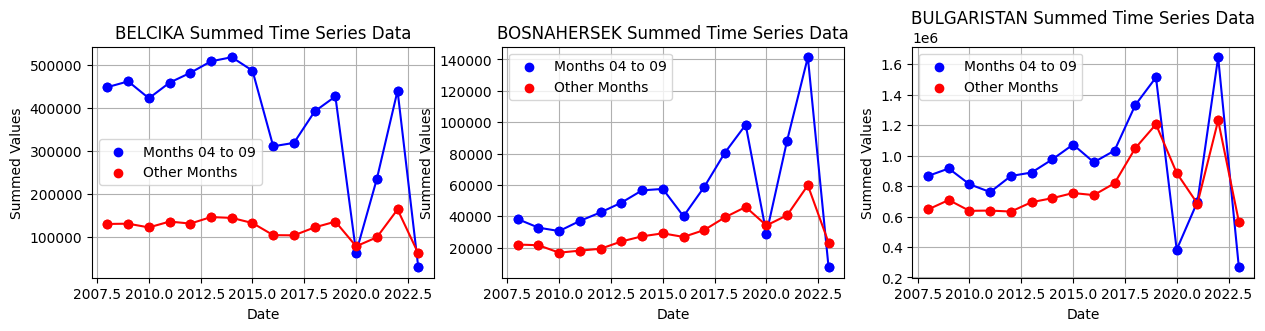

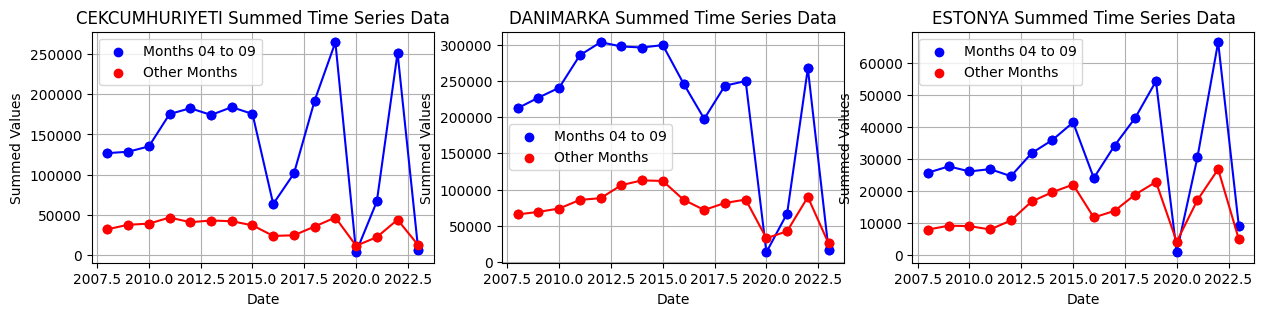

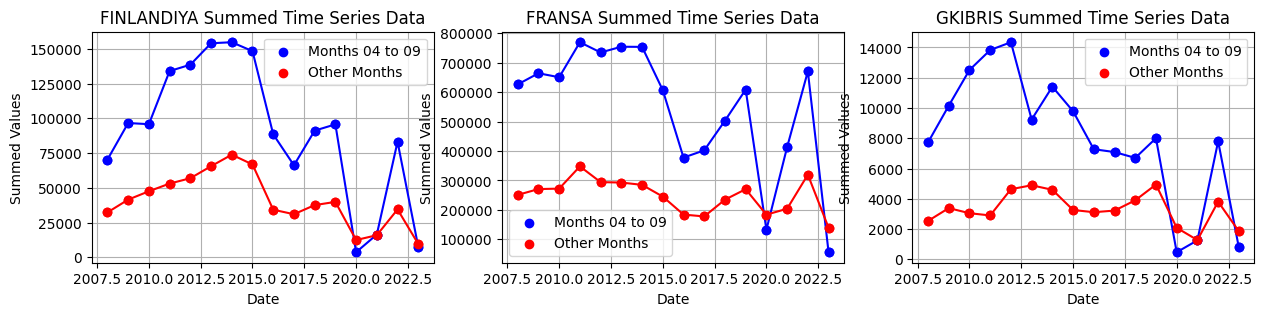

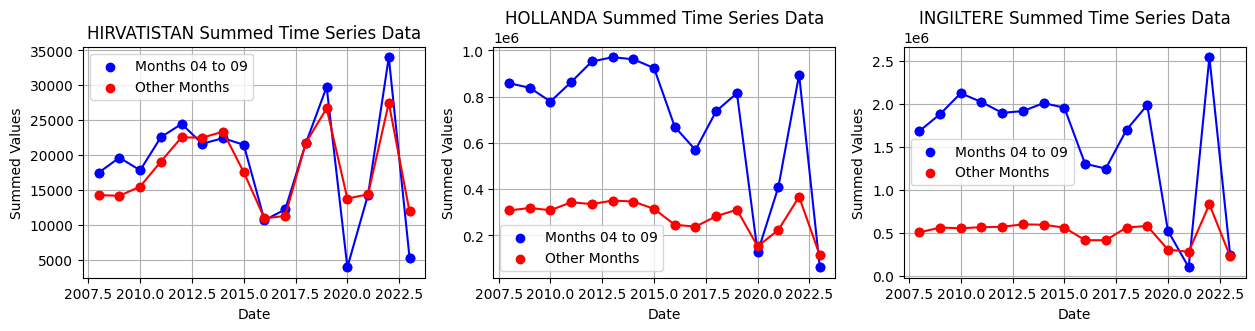

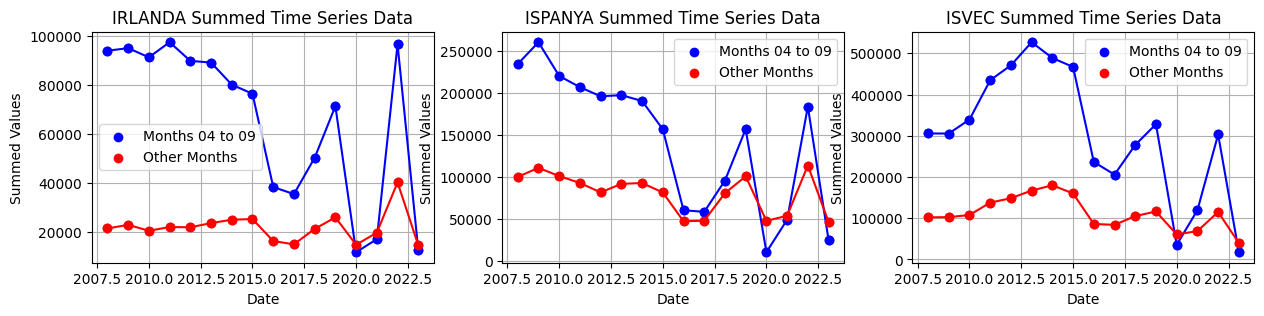

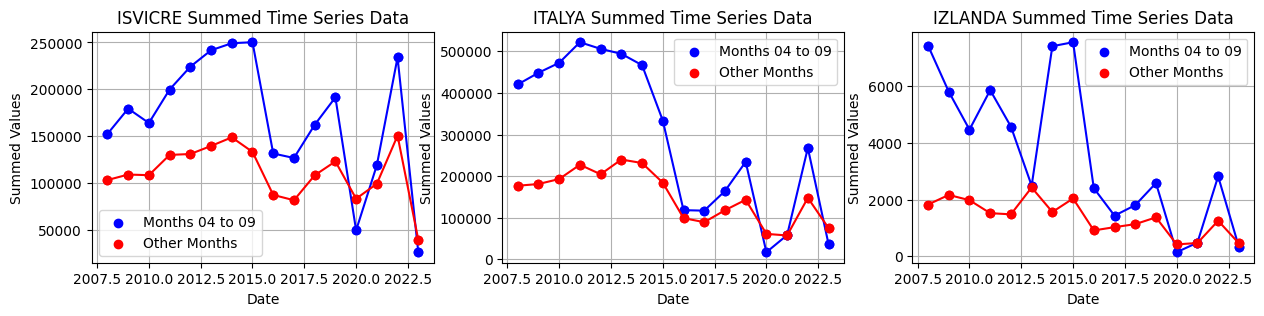

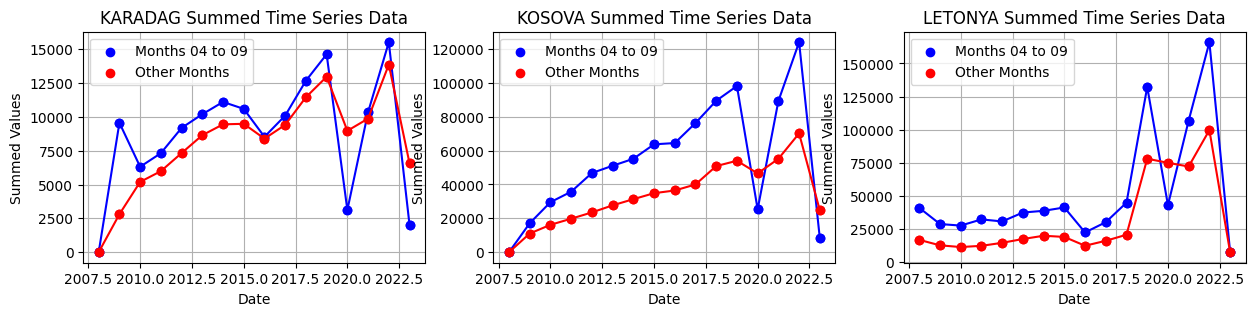

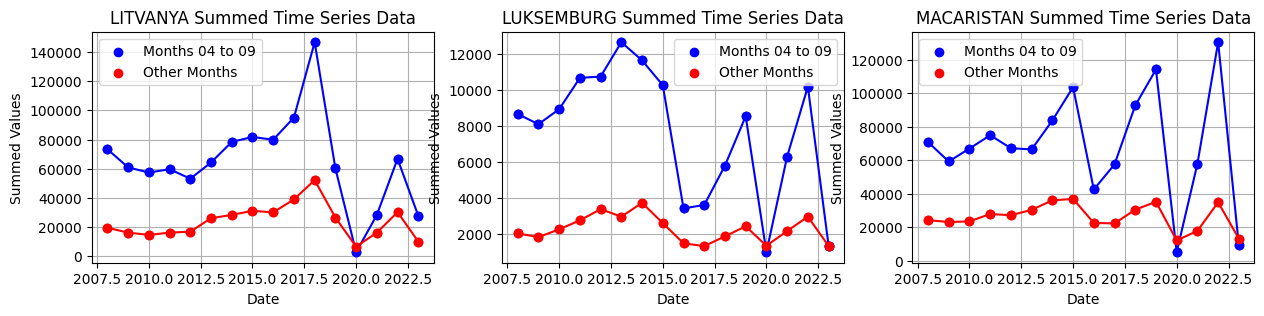

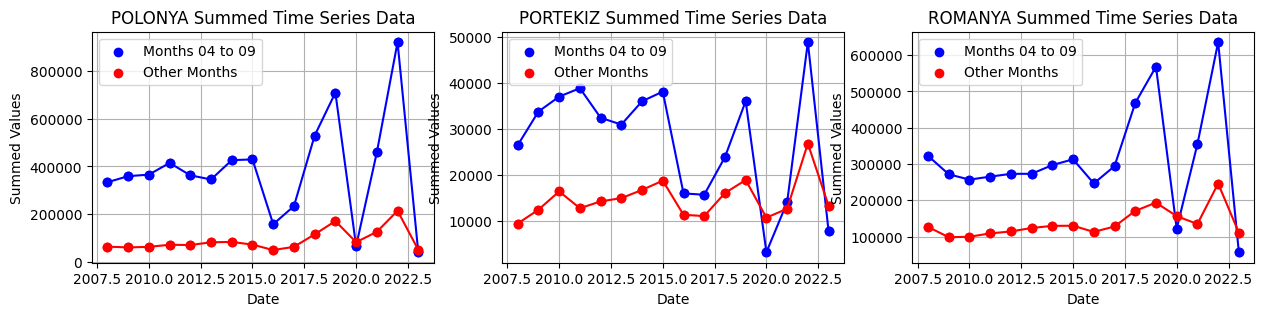

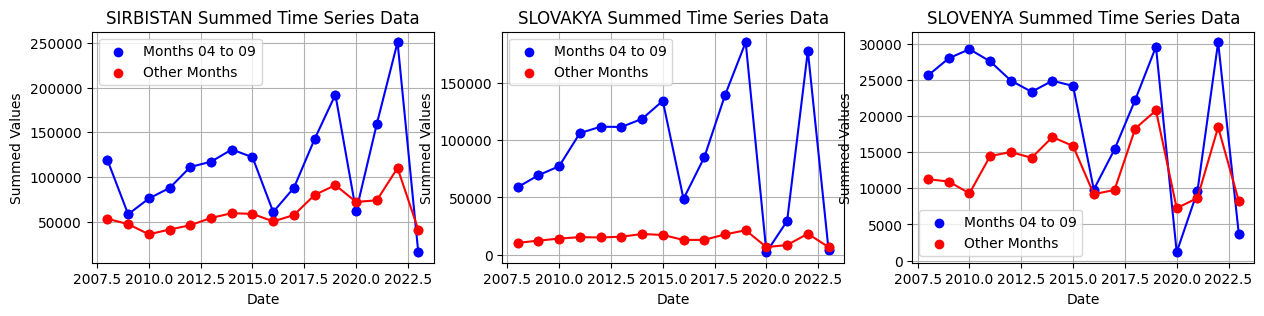

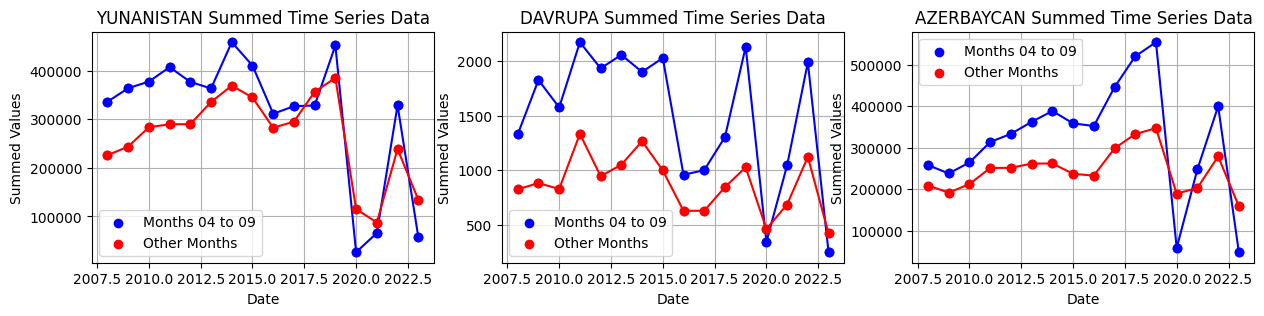

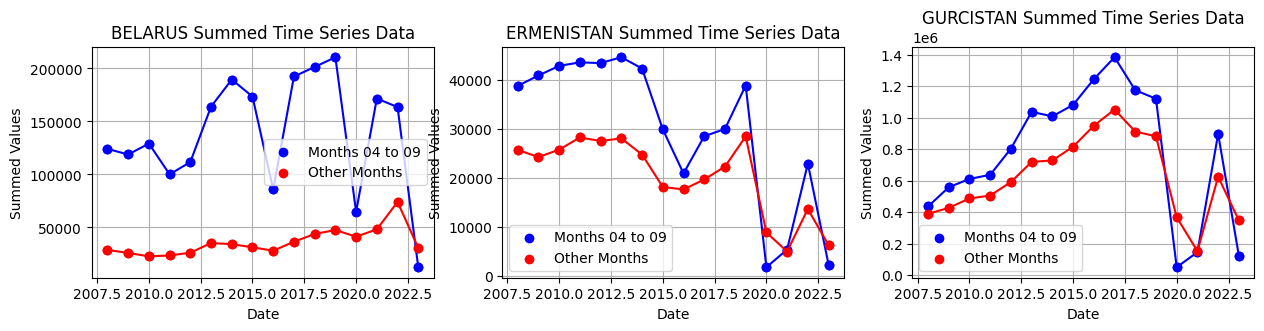

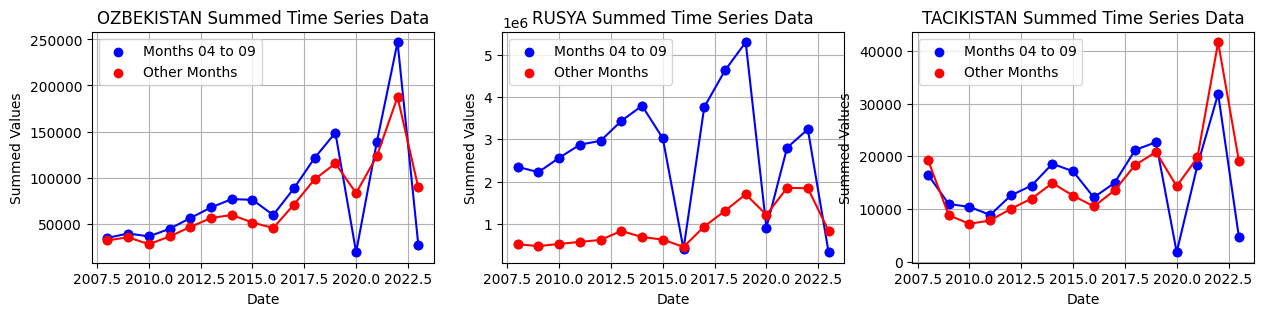

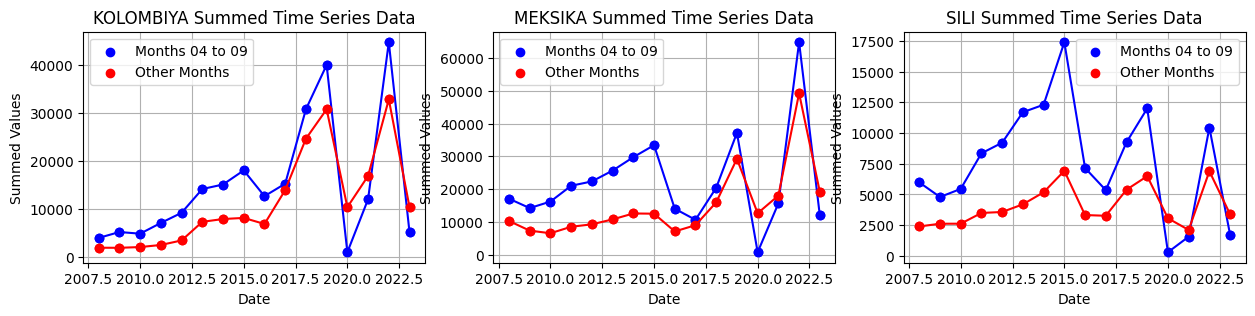

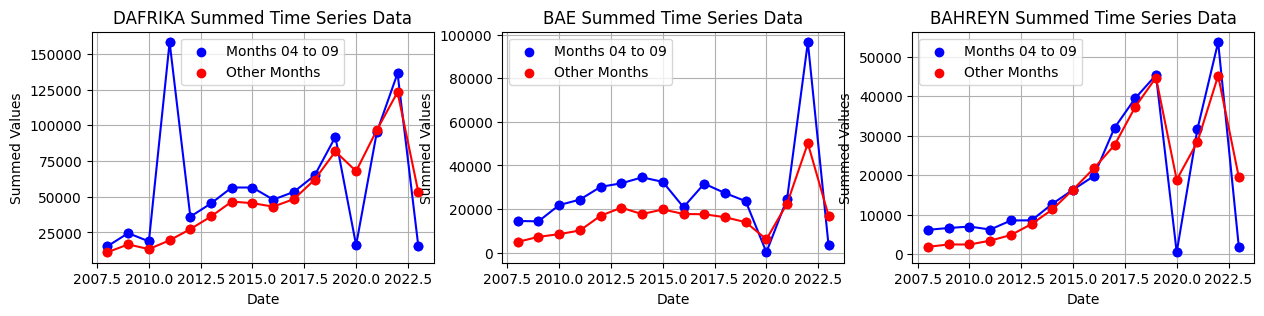

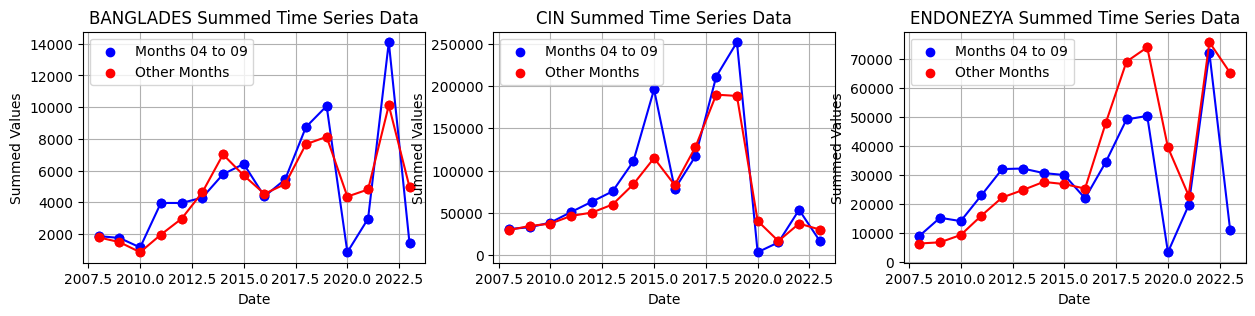

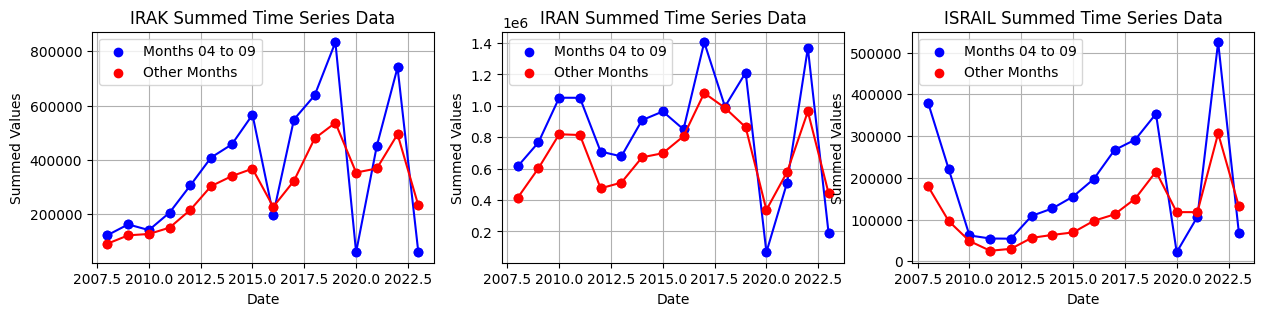

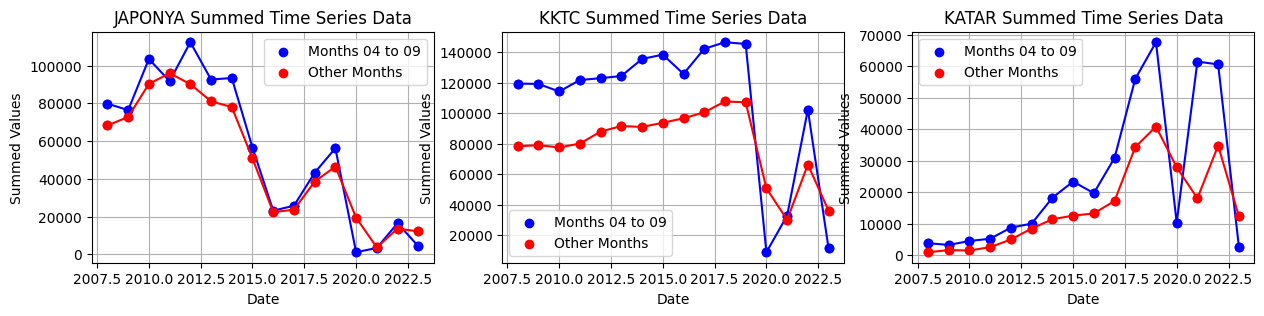

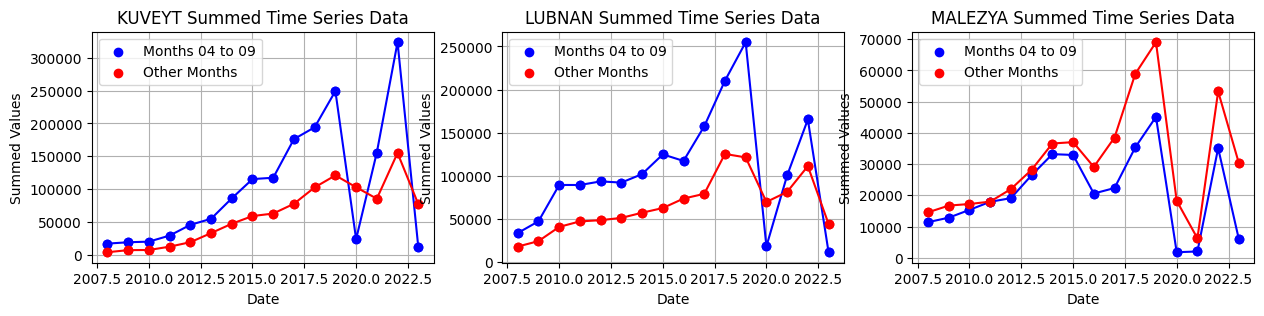

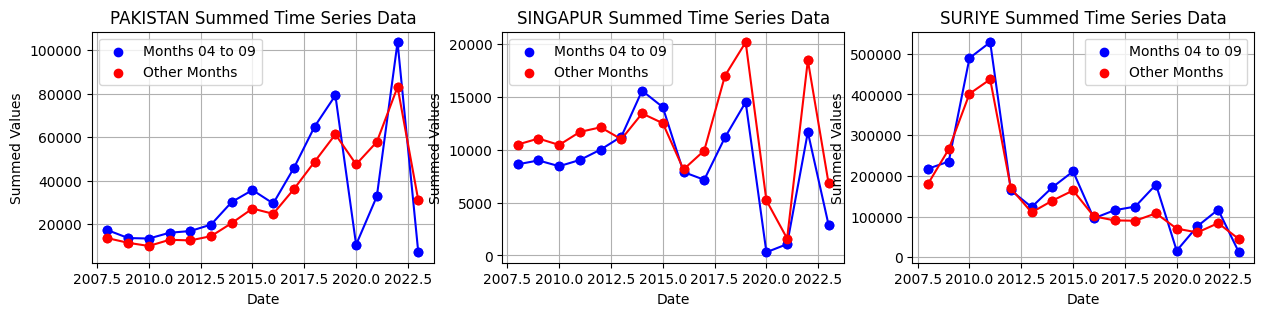

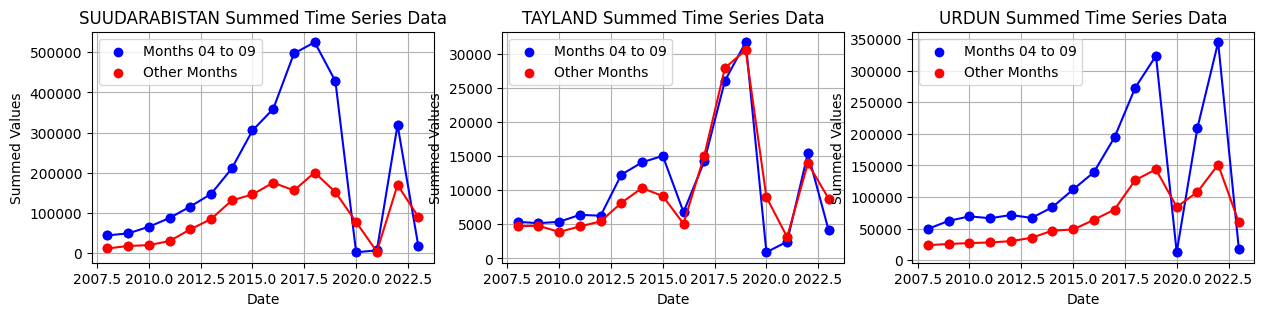

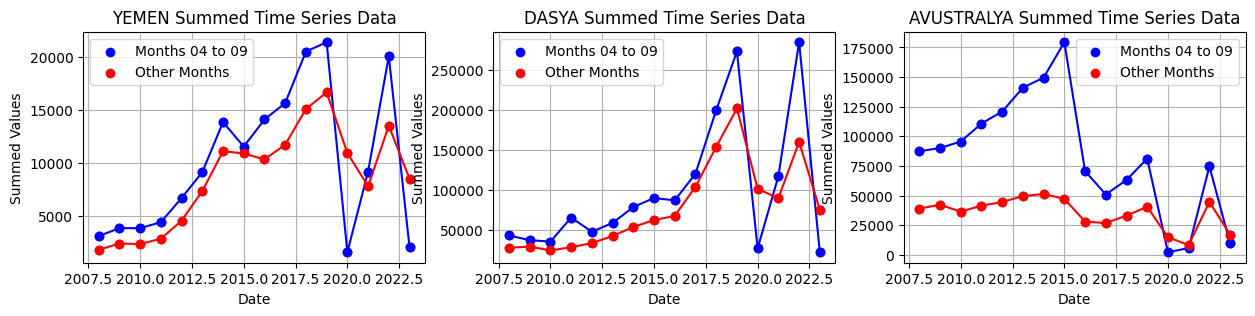

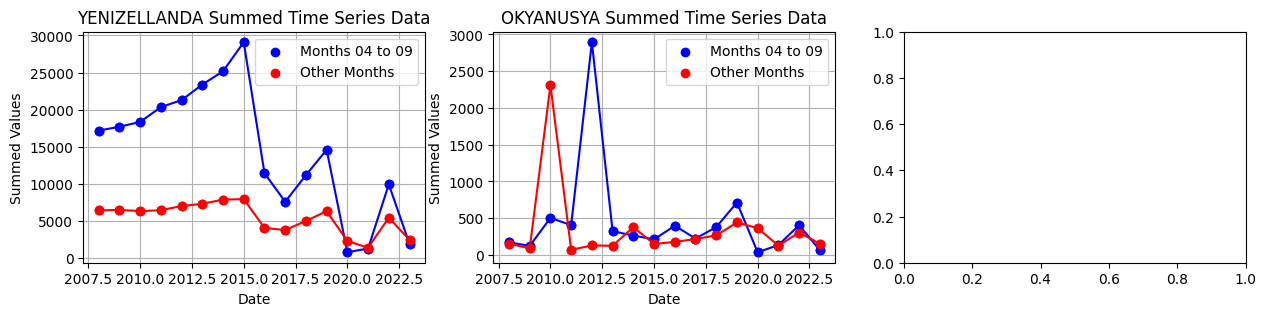

In [ ]:
#@title
# Converting 'Tarih' column to datetime format
df['Tarih'] = pd.to_datetime(df['Tarih'])

# Grouping the data based on the 'Month' column and calculate the sums for each group
grouped_data_04_to_09 = df[df['Tarih'].dt.month.between(4, 9)].groupby(df['Tarih'].dt.year).sum()
grouped_data_other_months = df[~df['Tarih'].dt.month.between(4, 9)].groupby(df['Tarih'].dt.year).sum()

# Creating dictionaries to store the major increases and decreases for each group
major_increases_blue = {}
major_decreases_blue = {}
major_increases_red = {}
major_decreases_red = {}
major_shift_dates = {}  # Nested dictionary to store the relationship between dates and column index numbers

# Function to calculate percentage change between two values
def calculate_percentage_change(current, previous):
    if previous == 0:
        return float('inf')  # Return positive infinity if previous value is 0 to avoid division by zero
    return (current - previous) / abs(previous) * 100

# Initializing a counter to keep track of the number of graphs displayed in a row
graphs_in_row = 0

# Plotting the summed up data for both groups on the same chart for each column
for col_idx, column in enumerate(df.columns[1:-1]):  # Starting from the 3rd column (excluding 'Tarih')
    if graphs_in_row == 0:
        # Creating a new row of subplots with 1 row and 3 columns
        fig, axes = plt.subplots(1, 3, figsize=(15, 3))

    # Scatter points with their own color
    axes[graphs_in_row].scatter(grouped_data_04_to_09.index, grouped_data_04_to_09[column], color='blue', label='Months 04 to 09', marker='o')
    axes[graphs_in_row].scatter(grouped_data_other_months.index, grouped_data_other_months[column], color='red', label='Other Months', marker='o')

    # Line connecting the points for each group with their own color
    axes[graphs_in_row].plot(grouped_data_04_to_09.index, grouped_data_04_to_09[column], color='blue', marker='o', linestyle='-')
    axes[graphs_in_row].plot(grouped_data_other_months.index, grouped_data_other_months[column], color='red', marker='o', linestyle='-')

    axes[graphs_in_row].set_title(column.replace('TP ODEMGZS ', '') + ' Summed Time Series Data')
    axes[graphs_in_row].set_xlabel('Date')
    axes[graphs_in_row].set_ylabel('Summed Values')
    axes[graphs_in_row].legend()
    axes[graphs_in_row].grid(True)

    graphs_in_row += 1

    # Calculating major changes and update the dictionaries
    blue_values = grouped_data_04_to_09[column].values
    red_values = grouped_data_other_months[column].values

    for i in range(1, len(blue_values)):
        # Calculating percentage changes for blue (04 to 09) and red (other months) separately
        blue_percentage_change = calculate_percentage_change(blue_values[i], blue_values[i-1])
        red_percentage_change = calculate_percentage_change(red_values[i], red_values[i-1])

        # Updating dictionaries for major increases and decreases for each group
        if blue_percentage_change > 30:
            key = f'{grouped_data_04_to_09.index[i-1]}-{grouped_data_04_to_09.index[i]}'
            major_increases_blue[key] = major_increases_blue.get(key, 0) + 1
            if key in major_shift_dates:
                major_shift_dates[key].append(str(col_idx))
            else:
                major_shift_dates[key] = [str(col_idx)]
        elif blue_percentage_change < -30:
            key = f'{grouped_data_04_to_09.index[i-1]}-{grouped_data_04_to_09.index[i]}'
            major_decreases_blue[key] = major_decreases_blue.get(key, 0) + 1
            if key in major_shift_dates:
                major_shift_dates[key].append(str(col_idx))
            else:
                major_shift_dates[key] = [str(col_idx)]

        if red_percentage_change > 30:
            key = f'{grouped_data_other_months.index[i-1]}-{grouped_data_other_months.index[i]}'
            major_increases_red[key] = major_increases_red.get(key, 0) + 1
            if key in major_shift_dates:
                major_shift_dates[key].append(str(col_idx))
            else:
                major_shift_dates[key] = [str(col_idx)]
        elif red_percentage_change < -30:
            key = f'{grouped_data_other_months.index[i-1]}-{grouped_data_other_months.index[i]}'
            major_decreases_red[key] = major_decreases_red.get(key, 0) + 1
            if key in major_shift_dates:
                major_shift_dates[key].append(str(col_idx))
            else:
                major_shift_dates[key] = [str(col_idx)]

    # If 3 graphs are displayed in a row, reset the counter and show the plot
    if graphs_in_row == 3:
        plt.show()
        graphs_in_row = 0

# If the last row has fewer than 3 graphs, show the remaining plots
if graphs_in_row > 0:
    plt.show()

**1c) Finding Major Shift Dates based on the Blue/Red Groups**

In [ ]:
#@title
print("Blue Group Major Increases:")
print(major_increases_blue)

print("\nBlue Group Major Decreases:")
print(major_decreases_blue)

print("\nRed Group Major Increases:")
print(major_increases_red)

print("\nRed Group Major Decreases:")
print(major_decreases_red)


Blue Group Major Increases:
{'2020-2021': 93, '2021-2022': 90, '2016-2017': 32, '2017-2018': 55, '2018-2019': 34, '2008-2009': 16, '2010-2011': 22, '2013-2014': 16, '2009-2010': 11, '2011-2012': 13, '2014-2015': 8, '2012-2013': 9, '2015-2016': 2}

Blue Group Major Decreases:
{'2015-2016': 54, '2019-2020': 95, '2022-2023': 95, '2012-2013': 3, '2020-2021': 1, '2016-2017': 3, '2009-2010': 4, '2018-2019': 1, '2008-2009': 3, '2021-2022': 1, '2013-2014': 1, '2011-2012': 4, '2010-2011': 1, '2014-2015': 1}

Red Group Major Increases:
{'2017-2018': 56, '2020-2021': 24, '2021-2022': 90, '2018-2019': 17, '2011-2012': 18, '2012-2013': 18, '2008-2009': 22, '2014-2015': 6, '2009-2010': 9, '2016-2017': 16, '2013-2014': 15, '2010-2011': 18, '2015-2016': 3}

Red Group Major Decreases:
{'2019-2020': 77, '2022-2023': 90, '2009-2010': 6, '2015-2016': 32, '2020-2021': 23, '2013-2014': 2, '2018-2019': 1, '2014-2015': 4, '2008-2009': 4, '2021-2022': 1, '2016-2017': 1, '2011-2012': 2, '2010-2011': 2, '2012-20

**1d) Ranking and Displaying Major Shifts Chart**

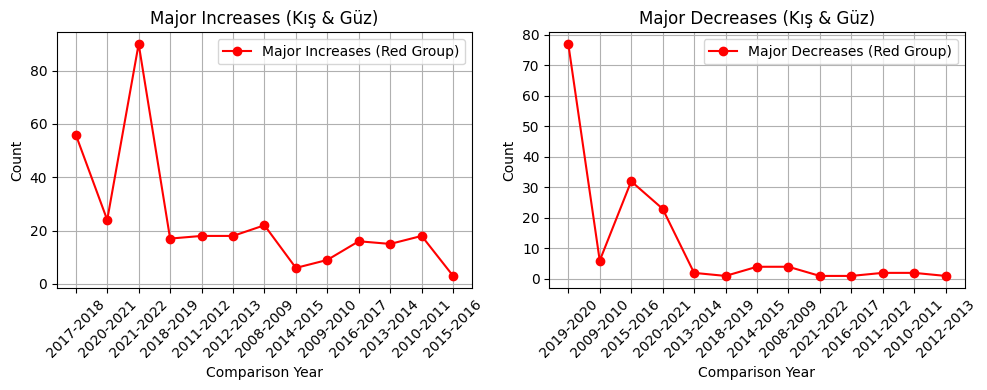

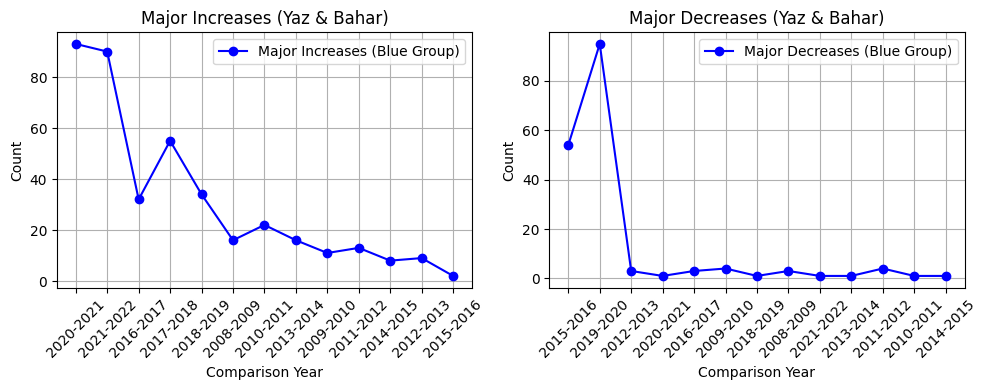

In [ ]:
# @title
# Data for Blue Group Major Increases and Decreases
major_increases_blue = {'2020-2021': 93, '2021-2022': 90, '2016-2017': 32, '2017-2018': 55, '2018-2019': 34, '2008-2009': 16, '2010-2011': 22, '2013-2014': 16, '2009-2010': 11, '2011-2012': 13, '2014-2015': 8, '2012-2013': 9, '2015-2016': 2}
major_decreases_blue = {'2015-2016': 54, '2019-2020': 95, '2012-2013': 3, '2020-2021': 1, '2016-2017': 3, '2009-2010': 4, '2018-2019': 1, '2008-2009': 3, '2021-2022': 1, '2013-2014': 1, '2011-2012': 4, '2010-2011': 1, '2014-2015': 1}

# Data for Red Group Major Increases and Decreases
major_increases_red = {'2017-2018': 56, '2020-2021': 24, '2021-2022': 90, '2018-2019': 17, '2011-2012': 18, '2012-2013': 18, '2008-2009': 22, '2014-2015': 6, '2009-2010': 9, '2016-2017': 16, '2013-2014': 15, '2010-2011': 18, '2015-2016': 3}
major_decreases_red = {'2019-2020': 77, '2009-2010': 6, '2015-2016': 32, '2020-2021': 23, '2013-2014': 2, '2018-2019': 1, '2014-2015': 4, '2008-2009': 4, '2021-2022': 1, '2016-2017': 1, '2011-2012': 2, '2010-2011': 2, '2012-2013': 1}


fig, axes = plt.subplots(1, 2, figsize=(10, 4))


axes[0].plot(major_increases_red.keys(), major_increases_red.values(), color='red', marker='o', linestyle='-', label='Major Increases (Red Group)')
axes[0].set_title('Major Increases (Kış & Güz)')
axes[0].set_xlabel('Comparison Year')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
axes[0].grid(True)
axes[0].legend()

axes[1].plot(major_decreases_red.keys(), major_decreases_red.values(), color='red', marker='o', linestyle='-', label='Major Decreases (Red Group)')
axes[1].set_title('Major Decreases (Kış & Güz)')
axes[1].set_xlabel('Comparison Year')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
axes[1].grid(True)
axes[1].legend()

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].plot(major_increases_blue.keys(), major_increases_blue.values(), color='blue', marker='o', linestyle='-', label='Major Increases (Blue Group)')
axes[0].set_title('Major Increases (Yaz & Bahar)')
axes[0].set_xlabel('Comparison Year')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True)
axes[0].legend()


axes[1].plot(major_decreases_blue.keys(), major_decreases_blue.values(), color='blue', marker='o', linestyle='-', label='Major Decreases (Blue Group)')
axes[1].set_title('Major Decreases (Yaz & Bahar)')
axes[1].set_xlabel('Comparison Year')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True)
axes[1].legend()

plt.tight_layout()
plt.show()


**1e) Finding the top 5 countries for Turkey's tourism each year**

In [ ]:
# @title
import pandas as pd


df['Tarih'] = pd.to_datetime(df['Tarih'])

yearly_summations = {}
for year in range(2008, 2024):

    year_data = df[df['Tarih'].dt.year == year]

    summations = year_data.iloc[:, 1:-1].sum()


    summation_dict = summations.to_dict()

    year_str = str(year) + '-' + str(year + 1)
    yearly_summations[year_str] = summation_dict

top_5_columns_by_year = {}
for year_range, summation_dict in yearly_summations.items():

    sorted_columns = sorted(summation_dict, key=summation_dict.get, reverse=True)[:5]

    top_5_columns_by_year[year_range] = sorted_columns

for year_range, top_columns in top_5_columns_by_year.items():
    print(f"Year: {year_range}")
    print("Top 5 columns with the highest summations:")
    for i, column in enumerate(top_columns, 1):
        print(f"{i}. {column}: {yearly_summations[year_range][column]}")
    print()


Year: 2008-2009
Top 5 columns with the highest summations:
1. TP ODEMGZS ALMANYA: 4396948.0
2. TP ODEMGZS RUSYA: 2863857.0
3. TP ODEMGZS INGILTERE: 2190254.0
4. TP ODEMGZS BULGARISTAN: 1512243.0
5. TP ODEMGZS HOLLANDA: 1166101.0

Year: 2009-2010
Top 5 columns with the highest summations:
1. TP ODEMGZS ALMANYA: 4481571.0
2. TP ODEMGZS RUSYA: 2696784.0
3. TP ODEMGZS INGILTERE: 2445015.0
4. TP ODEMGZS BULGARISTAN: 1623640.0
5. TP ODEMGZS IRAN: 1369896.0

Year: 2010-2011
Top 5 columns with the highest summations:
1. TP ODEMGZS ALMANYA: 4370248.0
2. TP ODEMGZS RUSYA: 3087737.0
3. TP ODEMGZS INGILTERE: 2680588.0
4. TP ODEMGZS IRAN: 1870953.0
5. TP ODEMGZS BULGARISTAN: 1448923.0

Year: 2011-2012
Top 5 columns with the highest summations:
1. TP ODEMGZS ALMANYA: 4815156.0
2. TP ODEMGZS RUSYA: 3446650.0
3. TP ODEMGZS INGILTERE: 2590661.0
4. TP ODEMGZS IRAN: 1865502.0
5. TP ODEMGZS BULGARISTAN: 1399434.0

Year: 2012-2013
Top 5 columns with the highest summations:
1. TP ODEMGZS ALMANYA: 5025660.0


<ipython-input-213-3fa92cd53fba>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# @title
# @title
!pip install plotly
import plotly.graph_objs as go
import re

data = """
Year: 2008-2009
Top 5 columns with the highest summations:
1. TP ODEMGZS ALMANYA: 4396948.0
2. TP ODEMGZS RUSYA: 2863857.0
3. TP ODEMGZS INGILTERE: 2190254.0
4. TP ODEMGZS BULGARISTAN: 1512243.0
5. TP ODEMGZS HOLLANDA: 1166101.0

Year: 2009-2010
Top 5 columns with the highest summations:
1. TP ODEMGZS ALMANYA: 4481571.0
2. TP ODEMGZS RUSYA: 2696784.0
3. TP ODEMGZS INGILTERE: 2445015.0
4. TP ODEMGZS BULGARISTAN: 1623640.0
5. TP ODEMGZS IRAN: 1369896.0

Year: 2010-2011
Top 5 columns with the highest summations:
1. TP ODEMGZS ALMANYA: 4370248.0
2. TP ODEMGZS RUSYA: 3087737.0
3. TP ODEMGZS INGILTERE: 2680588.0
4. TP ODEMGZS IRAN: 1870953.0
5. TP ODEMGZS BULGARISTAN: 1448923.0

Year: 2011-2012
Top 5 columns with the highest summations:
1. TP ODEMGZS ALMANYA: 4815156.0
2. TP ODEMGZS RUSYA: 3446650.0
3. TP ODEMGZS INGILTERE: 2590661.0
4. TP ODEMGZS IRAN: 1865502.0
5. TP ODEMGZS BULGARISTAN: 1399434.0

Year: 2012-2013
Top 5 columns with the highest summations:
1. TP ODEMGZS ALMANYA: 5025660.0
2. TP ODEMGZS RUSYA: 3585728.0
3. TP ODEMGZS INGILTERE: 2469711.0
4. TP ODEMGZS BULGARISTAN: 1498461.0
5. TP ODEMGZS GURCISTAN: 1393971.0

Year: 2013-2014
Top 5 columns with the highest summations:
1. TP ODEMGZS ALMANYA: 5048199.0
2. TP ODEMGZS RUSYA: 4269220.0
3. TP ODEMGZS INGILTERE: 2518016.0
4. TP ODEMGZS GURCISTAN: 1755484.0
5. TP ODEMGZS BULGARISTAN: 1582896.0

Year: 2014-2015
Top 5 columns with the highest summations:
1. TP ODEMGZS ALMANYA: 5251870.0
2. TP ODEMGZS RUSYA: 4482388.0
3. TP ODEMGZS INGILTERE: 2606629.0
4. TP ODEMGZS GURCISTAN: 1736134.0
5. TP ODEMGZS BULGARISTAN: 1695504.0

Year: 2015-2016
Top 5 columns with the highest summations:
1. TP ODEMGZS ALMANYA: 5593065.0
2. TP ODEMGZS RUSYA: 3652430.0
3. TP ODEMGZS INGILTERE: 2520053.0
4. TP ODEMGZS GURCISTAN: 1895646.0
5. TP ODEMGZS BULGARISTAN: 1826177.0

Year: 2016-2017
Top 5 columns with the highest summations:
1. TP ODEMGZS ALMANYA: 3928954.0
2. TP ODEMGZS GURCISTAN: 2192582.0
3. TP ODEMGZS INGILTERE: 1720787.0
4. TP ODEMGZS BULGARISTAN: 1696645.0
5. TP ODEMGZS IRAN: 1657005.0

Year: 2017-2018
Top 5 columns with the highest summations:
1. TP ODEMGZS RUSYA: 4699557.0
2. TP ODEMGZS ALMANYA: 3594136.0
3. TP ODEMGZS IRAN: 2486770.0
4. TP ODEMGZS GURCISTAN: 2435022.0
5. TP ODEMGZS BULGARISTAN: 1850800.0

Year: 2018-2019
Top 5 columns with the highest summations:
1. TP ODEMGZS RUSYA: 5937850.0
2. TP ODEMGZS ALMANYA: 4496173.0
3. TP ODEMGZS BULGARISTAN: 2379262.0
4. TP ODEMGZS INGILTERE: 2262509.0
5. TP ODEMGZS GURCISTAN: 2085732.0

Year: 2019-2020
Top 5 columns with the highest summations:
1. TP ODEMGZS RUSYA: 7000407.0
2. TP ODEMGZS ALMANYA: 5024193.0
3. TP ODEMGZS BULGARISTAN: 2718145.0
4. TP ODEMGZS INGILTERE: 2569486.0
5. TP ODEMGZS IRAN: 2075123.0

Year: 2020-2021
Top 5 columns with the highest summations:
1. TP ODEMGZS RUSYA: 2124373.0
2. TP ODEMGZS BULGARISTAN: 1268457.0
3. TP ODEMGZS ALMANYA: 1178352.0
4. TP ODEMGZS UKRAYNA: 994122.0
5. TP ODEMGZS INGILTERE: 829319.0

Year: 2021-2022
Top 5 columns with the highest summations:
1. TP ODEMGZS RUSYA: 4658759.0
2. TP ODEMGZS ALMANYA: 3014611.0
3. TP ODEMGZS UKRAYNA: 2056602.0
4. TP ODEMGZS BULGARISTAN: 1381218.0
5. TP ODEMGZS IRAN: 1090452.0

Year: 2022-2023
Top 5 columns with the highest summations:
1. TP ODEMGZS ALMANYA: 5689999.0
2. TP ODEMGZS RUSYA: 5080514.0
3. TP ODEMGZS INGILTERE: 3379338.0
4. TP ODEMGZS BULGARISTAN: 2875588.0
5. TP ODEMGZS IRAN: 2332813.0

Year: 2023-2024
Top 5 columns with the highest summations:
1. TP ODEMGZS RUSYA: 1164930.0
2. TP ODEMGZS ALMANYA: 949886.0
3. TP ODEMGZS BULGARISTAN: 833194.0
4. TP ODEMGZS IRAN: 634592.0
5. TP ODEMGZS INGILTERE: 474507.0
"""

yearly_summations = {}


years_data = data.strip().split("Year: ")[1:]

for year_data in years_data:
    lines = year_data.strip().split("\n")
    year_range = lines[0]
    year_summations = {}
    for line in lines[2:]:
        match = re.match(r"(\d+)\. TP ODEMGZS (.+?): (\d+\.\d+)", line)
        if match:
            rank, column, summation = match.groups()
            year_summations[column.strip()] = float(summation)
    yearly_summations[year_range] = year_summations

**1f) Visualizing the Top 5 Countries for tourism in Turkey (2008-2023)**

In [ ]:
# @title
years = list(yearly_summations.keys())
countries = set(country for year_data in yearly_summations.values() for country in year_data.keys())

frames = []

for i, year in enumerate(years):
    sorted_countries = sorted(countries, key=lambda country: yearly_summations[year].get(country, 0), reverse=True)

    top_5_countries = sorted_countries[:5]


    sorted_countries = sorted_countries[::-1]

    traces = [
        go.Bar(
            x=[country],
            y=[yearly_summations[year].get(country, 0)],
            text=[f"{country}: {yearly_summations[year].get(country, 0)}"],
            textposition='auto',
            name=year,
            visible=(country in top_5_countries),
        )
        for country in sorted_countries  # Iterate in sorted order
    ]


    frame = go.Frame(
        data=traces,
        name=year,
        layout=go.Layout(title=f"Top 5 Countries for Tourism in Turkey - Year: {year}", yaxis_range=[0, 7500000]),
    )
    frames.append(frame)

figure = go.Figure(data=frames[0].data, frames=frames)


slider_steps = [
    {
        'args': [
            [frame.name],  # Frame name (year)
            {
                'frame': {'duration': 1000, 'redraw': True},
                'mode': 'immediate',
                'transition': {'duration': 300},
            },
        ],
        'label': frame.name,
        'method': 'animate',
    }
    for frame in frames
]


figure.update_layout(
    sliders=[{'active': 0, 'pad': {'t': 50}, 'steps': slider_steps}],
    xaxis_title='Country',
    yaxis_title='Tourism Value',
    showlegend=False,
)

# Show the figure
figure.show()

##2 Income from Tourism (2012 - 2022)

**2a) External Data Source EDA**

*   Dataset Reading & Cleaning
*   Column Cleaning

*   Accessing Total Cases Data of Russia and Germany
*   TCMB Dataset Data Filtering

*   Visualization


---

Link to the external data source: https://www.kaggle.com/datasets/shashwatwork/impact-of-covid19-pandemic-on-the-global-economy


---













In [ ]:
#@title
file_path2 = '/content/drive/MyDrive/raw_data.csv'
df_external =pd.read_csv(file_path2)

#@title
df_external = df_external.dropna()

print("\nMissing values in each column:")
print(df_external.isnull().sum())

print(len(df_external))


Missing values in each column:
iso_code                   0
location                   0
date                       0
total_cases                0
total_deaths               0
stringency_index           0
population                 0
gdp_per_capita             0
human_development_index    0
Unnamed: 9                 0
Unnamed: 10                0
Unnamed: 11                0
Unnamed: 12                0
Unnamed: 13                0
dtype: int64
31518


In [ ]:
#@title
columns_to_keep =['location','date','total_cases']
df_external = df_external[columns_to_keep]
df_external = df_external[df_external['location'].isin(['Germany', 'Russia'])]

print(df_external.head())

      location        date  total_cases
17722  Germany  2020-03-10       1139.0
17723  Germany  2020-03-11       1296.0
17724  Germany  2020-03-12       1567.0
17725  Germany  2020-03-13       2369.0
17726  Germany  2020-03-14       3062.0


In [ ]:
# @title
df_external['date'] = pd.to_datetime(df_external['date'])

df_monthly_sum = df_external.groupby([df_external['date'].dt.year.rename('Year'), df_external['date'].dt.month.rename('Month'), 'location'])['total_cases'].sum().reset_index()

df_monthly_sum['Monthly Total Cases'] = df_monthly_sum['total_cases']

df_monthly_sum.drop('total_cases', axis=1, inplace=True)

print(df_monthly_sum)

    Year  Month location  Monthly Total Cases
0   2020      3  Germany             477896.0
1   2020      3   Russia               6510.0
2   2020      4  Germany            3737253.0
3   2020      4   Russia            1025276.0
4   2020      5  Germany            5348754.0
5   2020      5   Russia            7957748.0
6   2020      6  Germany            5624689.0
7   2020      6   Russia           15877211.0
8   2020      7  Germany            6224385.0
9   2020      7   Russia           23078116.0
10  2020      8  Germany            6969025.0
11  2020      8   Russia           28419995.0
12  2020      9  Germany            7938368.0
13  2020      9   Russia           32230907.0
14  2020     10  Germany            1482931.0
15  2020     10   Russia           14803827.0


In [ ]:
# @title
# Filter the DataFrame to include only the data between 2020-03 and 2020-10
df_rusya = df_almanya
start_date = '2019-03-01'
end_date = '2021-10-31'
filtered_data = df_copy[(df_almanya['Date'] >= start_date) & (df_almanya['Date'] <= end_date)]

# Create a dictionary to store the data
data_dict = {}
data_dict_rusya = {}
data_dict['TP ODEMGZS ALMANYA'] = filtered_data['TP ODEMGZS ALMANYA'].tolist()
data_dict_rusya['TP ODEMGZS RUSYA'] = filtered_data['TP ODEMGZS RUSYA'].tolist()
print(data_dict)
print(data_dict_rusya)


{'TP ODEMGZS ALMANYA': [179370, 327728, 366351, 512455, 591047, 903720, 702318, 763741, 255958, 150389, 180881, 141536, 110649, 2888, 1740, 16837, 94960, 228601, 166164, 145682, 49837, 38577, 39211, 29806, 46729, 74190, 60295, 137124, 404018, 811734, 522290, 537802]}
{'TP ODEMGZS RUSYA': [123671, 232488, 856511, 1021201, 1055387, 1078045, 1057296, 980589, 288156, 111926, 154941, 101284, 94333, 1413, 1512, 3083, 8051, 294313, 601864, 590914, 198463, 74202, 110237, 76382, 182245, 204845, 20684, 42060, 703659, 898620, 935117, 1031717]}


<ipython-input-220-9a4ef30b3031>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-220-9a4ef30b3031>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



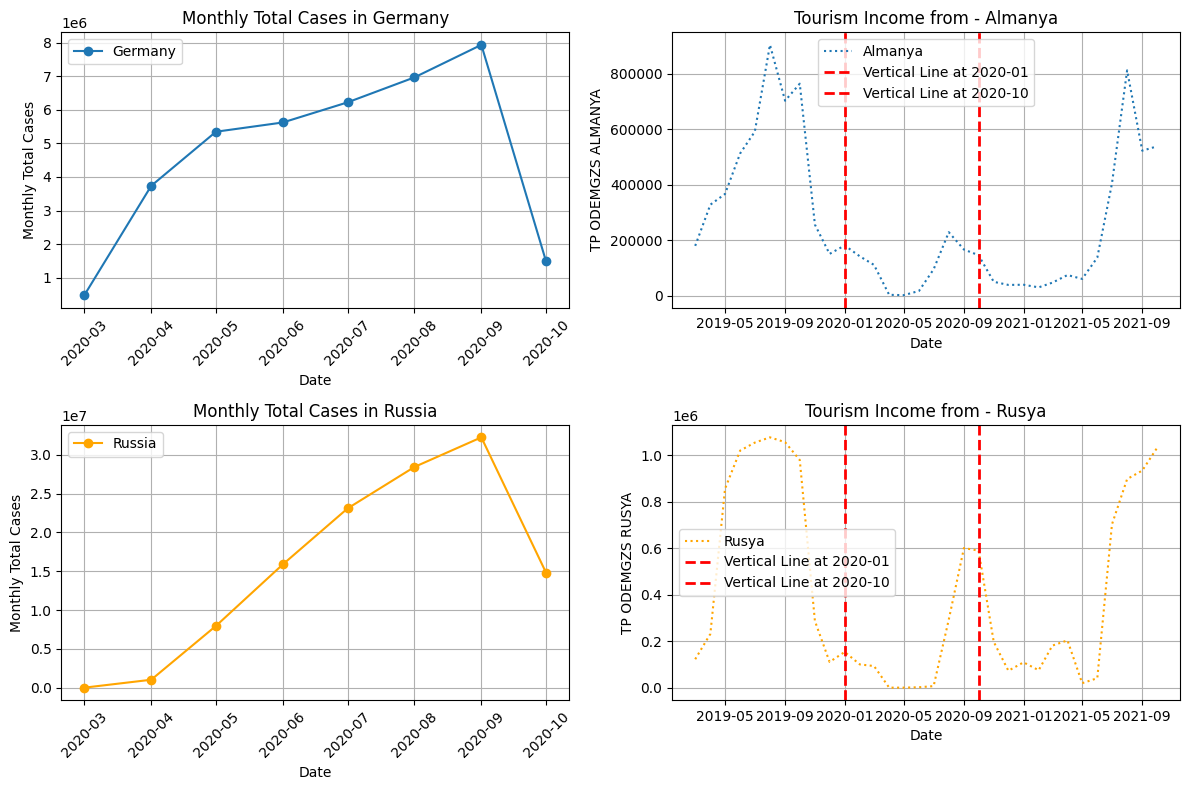

In [ ]:
# @title

df_external['date'] = pd.to_datetime(df_external['date'])

df_monthly_sum = df_external.groupby([df_external['date'].dt.year.rename('Year'), df_external['date'].dt.month.rename('Month'), 'location'])['total_cases'].sum().reset_index()

df_monthly_sum_filtered = df_monthly_sum[df_monthly_sum['location'].isin(['Germany', 'Russia'])]

df_germany = df_monthly_sum_filtered[df_monthly_sum_filtered['location'] == 'Germany']
df_russia = df_monthly_sum_filtered[df_monthly_sum_filtered['location'] == 'Russia']

df_germany['Date'] = pd.to_datetime(df_germany[['Year', 'Month']].assign(day=1))
df_russia['Date'] = pd.to_datetime(df_russia[['Year', 'Month']].assign(day=1))

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

axs[0, 0].plot(df_germany['Date'], df_germany['total_cases'], marker='o', linestyle='-', label='Germany')
axs[0, 0].set_xlabel('Date')
axs[0, 0].set_ylabel('Monthly Total Cases')
axs[0, 0].set_title('Monthly Total Cases in Germany')
axs[0, 0].grid(True)
axs[0, 0].legend()
axs[0, 0].tick_params(axis='x', rotation=45)

axs[0, 1].plot(filtered_data['Date'], data_dict['TP ODEMGZS ALMANYA'], linestyle='dotted', label='Almanya')
axs[0, 1].axvline(pd.to_datetime('2020-01-01'), color='red', linestyle='dashed', label='Vertical Line at 2020-01', linewidth=2)
axs[0, 1].axvline(pd.to_datetime('2020-10-01'), color='red', linestyle='dashed', label='Vertical Line at 2020-10', linewidth=2)
axs[0, 1].set_xlabel('Date')
axs[0, 1].set_ylabel('TP ODEMGZS ALMANYA')
axs[0, 1].set_title('Tourism Income from - Almanya')
axs[0, 1].legend()
axs[0, 1].grid(True)

axs[1, 0].plot(df_russia['Date'], df_russia['total_cases'], marker='o', linestyle='-', color='orange', label='Russia')
axs[1, 0].set_xlabel('Date')
axs[1, 0].set_ylabel('Monthly Total Cases')
axs[1, 0].set_title('Monthly Total Cases in Russia')
axs[1, 0].grid(True)
axs[1, 0].legend()
axs[1, 0].tick_params(axis='x', rotation=45)

axs[1, 1].plot(filtered_data['Date'], data_dict_rusya['TP ODEMGZS RUSYA'], linestyle='dotted', label='Rusya', color='orange')
axs[1, 1].axvline(pd.to_datetime('2020-01-01'), color='red', linestyle='dashed', label='Vertical Line at 2020-01', linewidth=2)
axs[1, 1].axvline(pd.to_datetime('2020-10-01'), color='red', linestyle='dashed', label='Vertical Line at 2020-10', linewidth=2)
axs[1, 1].set_xlabel('Date')
axs[1, 1].set_ylabel('TP ODEMGZS RUSYA')
axs[1, 1].set_title('Tourism Income from - Rusya')
axs[1, 1].legend()
axs[1, 1].grid(True)

plt.tight_layout()

plt.show()

dolar

##2b) TL/USD Exchange Rate & Total Tourism Income Chronological Change Line Graph

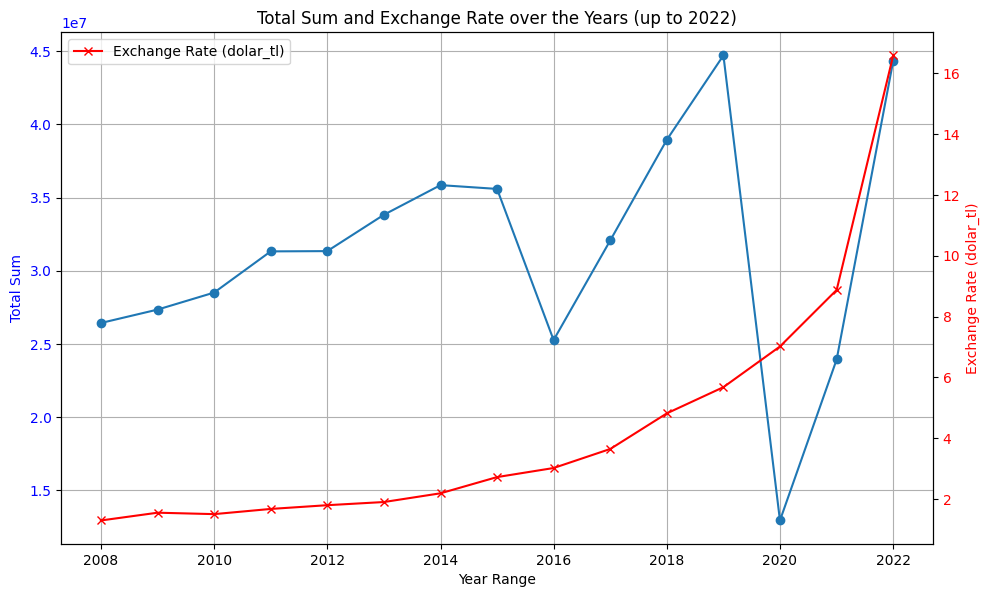

In [ ]:
# @title
# Defining the dolar_tl dictionary
dolar_tl = {
    '2008-2009': 1.29915,
    '2009-2010': 1.55453,
    '2010-2011': 1.5076,
    '2011-2012': 1.67806,
    '2012-2013': 1.80114,
    '2013-2014': 1.90543,
    '2014-2015': 2.19232,
    '2015-2016': 2.72515,
    '2016-2017': 3.02342,
    '2017-2018': 3.65007,
    '2018-2019': 4.82025,
    '2019-2020': 5.68111,
    '2020-2021': 7.01823,
    '2021-2022': 8.87734,
    '2022-2023': 16.58555,
    '2023-2024': 20.69809,
}

df_copy['Year'] = df_copy['Tarih'].dt.year

result_dict = {}
for year, group in df_copy.groupby('Year'):
    next_year = year + 1
    year_range = f"{year}-{next_year}"
    total_sum = group['TP ODEMGZS GTOPLAM'].sum()
    result_dict[year_range] = total_sum
df_result = pd.DataFrame(result_dict.items(), columns=['Year Range', 'Total Sum'])

df_result['Year Range'] = pd.to_datetime(df_result['Year Range'].str.split('-').str[0], format='%Y')


df_dolar_tl = pd.DataFrame(dolar_tl.items(), columns=['Year Range', 'Exchange Rate'])

df_dolar_tl['Year Range'] = pd.to_datetime(df_dolar_tl['Year Range'].str.split('-').str[0], format='%Y')

df_result = df_result[df_result['Year Range'] <= pd.to_datetime('2022-01-01')]
df_dolar_tl = df_dolar_tl[df_dolar_tl['Year Range'] <= pd.to_datetime('2022-01-01')]

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(df_result['Year Range'], df_result['Total Sum'], marker='o', linestyle='-', label='Total Sum')
ax1.set_xlabel('Year Range')
ax1.set_ylabel('Total Sum', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.grid(True)

ax2 = ax1.twinx()
ax2.plot(df_dolar_tl['Year Range'], df_dolar_tl['Exchange Rate'], marker='x', linestyle='-', color='r', label='Exchange Rate (dolar_tl)')
ax2.set_ylabel('Exchange Rate (dolar_tl)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

fig.tight_layout()
plt.title('Total Sum and Exchange Rate over the Years (up to 2022)')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.show()


##**3) Forecasting Perfect Tourist Mix for 2024**

###Data Preparation for Polynomial Regression Model

*   2020 & 2021 years are excluded from the dataset due to pandemic conditions high noise they will create in the dataset.



In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

df['Tarih'] = pd.to_datetime(df['Tarih'])

# Filtering data to exclude rows between 2020 and 2022
df = df[(df['Tarih'].dt.year < 2020) | (df['Tarih'].dt.year > 2022)]

In [ ]:
# Create a DataFrame to store the predictions for 2024
predictions_2024 = pd.DataFrame(columns=['Month', 'Column', 'Prediction'])

# Loop through each month from January to December
for month in range(1, 13):
    # Filter the data for the specific month of previous years
    train_data = df[df['Tarih'].dt.month == month]

    # Loop through each column (country income) in the DataFrame
    for column in df.columns[1:]:  # Exclude the 'Tarih' column
        # Prepare the data for the linear regression model
        X_train = train_data['Tarih'].dt.year.values.reshape(-1, 1)
        y_train = train_data[column].values.reshape(-1, 1)

        # Fit a polynomial regression model
        poly = PolynomialFeatures(degree=5)  # You can adjust the degree as needed
        X_train_poly = poly.fit_transform(X_train)

        model = LinearRegression()
        model.fit(X_train_poly, y_train)

        # Predict the value for 2024
        X_predict = np.array([2024]).reshape(-1, 1)
        X_predict_poly = poly.transform(X_predict)
        prediction = model.predict(X_predict_poly)[0][0]/1000*0.5

        # Store the prediction in the DataFrame
        predictions_2024 = pd.concat([predictions_2024, pd.DataFrame({'Month': [month], 'Column': [column], 'Prediction': [prediction]})], ignore_index=True)

# Print the predictions for 2024
predictions_2024 = predictions_2024[1:-3]


In [ ]:
total_sum_predictions = predictions_2024['Prediction'].sum()
print("Total Sum of Predictions:", total_sum_predictions)

total_sum_per_column = predictions_2024.groupby('Column')['Prediction'].sum().reset_index()
# Sort the DataFrame by 'Prediction' column in descending order
total_sum_per_column = total_sum_per_column.sort_values(by='Prediction', ascending=False)

print("\nTotal Sum for Each Column:")
print(total_sum_per_column.head())


Total Sum of Predictions: 55057.34107294002

Total Sum for Each Column:
                    Column    Prediction
77        TP ODEMGZS RUSYA  14407.741607
1       TP ODEMGZS ALMANYA   4284.198367
37    TP ODEMGZS INGILTERE   4160.164881
14  TP ODEMGZS BULGARISTAN   2650.117249
74      TP ODEMGZS POLONYA   2005.957355
